# importing bbc news dataset

In [1]:
import pandas as pd 
import numpy as np
import glob

In [2]:

# pd.set_option('display.max_colwidth', 100)
dataset = pd.read_csv('bbc_text.csv')
dataset

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


# Data exploration: knowing the bbc news dataset

In [22]:
import matplotlib.pyplot as pt

In [23]:
row , colums  =  dataset.shape
print(f'{row} rows or total datapoint <===> and  {colums} columns')

2225 rows or total datapoint <===> and  2 columns


In [24]:
dataset.category.unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [25]:
dataset['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [26]:
tech = len(dataset[dataset.category == 'tech'])
business = len(dataset[dataset.category == 'business'])
sport = len(dataset[dataset.category == 'sport'])
entertainment = len(dataset[dataset.category == 'entertainment'])
politics = len(dataset[dataset.category == 'politics'])

print(f'{tech} tech , {business} business , {sport} sport , {entertainment} entertainment , {politics} politics')

401 tech , 510 business , 511 sport , 386 entertainment , 417 politics


<BarContainer object of 5 artists>

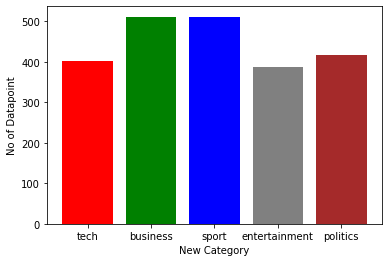

In [27]:
# visualizing using bar chart
y = [tech, business, sport, entertainment, politics]
X = ['tech' , 'business', 'sport' , 'entertainment', 'politics']
pt.xlabel('New Category')
pt.ylabel("No of Datapoint")
pt.bar(X, y , color=['red' , 'green', 'blue', 'gray', 'brown'])

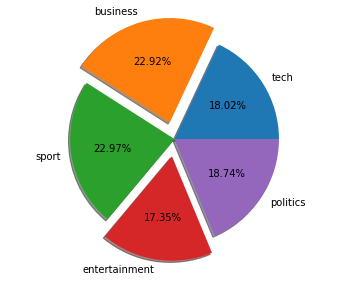

In [28]:
x = y
pt.axis('equal')
pt.pie(x, labels=X , radius=1.2, autopct="%0.2f%%", explode=[0,0.2,0,0.2,0], shadow=True )
pt.show()

In [29]:
# let check for missing datapoint
missing_datapoint = dataset['category'].isnull().sum()
print('missing datapoint count : ' , missing_datapoint )

missing datapoint count :  0


# data cleaning :  bbc news data cleaning and preprocessing

In [30]:
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
stop_word = stopwords.words('english')
print(stop_word[:10])
print(string.punctuation)

ps = PorterStemmer()
print(ps.stem('hits'))
print(ps.stem('hit'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
hit
hit


In [31]:
dataset.sample(3)

,category,text
131,entertainment,film production falls 40% in uk the number o...
1017,sport,qpr keeper day heads for preston queens park r...
1582,sport,martinez sees off vinci challenge veteran span...


In [32]:
ps = PorterStemmer()

def dataset_cleaning(text):
    #  removeing punctuation from the dataset
    text = ''.join([token for token in text if not token in string.punctuation])
    # tokenizing the dataset e.g ['tv' , 'future' , 'in' , 'the']
    token = word_tokenize(text)
    # removing stopword (words that had less meaning to the dataset)     
    text  = [ps.stem(t) for t in token if not t in stop_word ]
    return text 

dataset['clean_text'] = dataset["text"].apply(lambda x: dataset_cleaning(x))

In [33]:
dataset.head(10)

,category,text,clean_text
0,tech,tv future in the hands of viewers with home th...,"[tv, futur, hand, viewer, home, theatr, system..."
1,business,worldcom boss left books alone former worldc...,"[worldcom, boss, left, book, alon, former, wor..."
2,sport,tigers wary of farrell gamble leicester say ...,"[tiger, wari, farrel, gambl, leicest, say, rus..."
3,sport,yeading face newcastle in fa cup premiership s...,"[yead, face, newcastl, fa, cup, premiership, s..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,"[ocean, twelv, raid, box, offic, ocean, twelv,..."
5,politics,howard hits back at mongrel jibe michael howar...,"[howard, hit, back, mongrel, jibe, michael, ho..."
6,politics,blair prepares to name poll date tony blair is...,"[blair, prepar, name, poll, date, toni, blair,..."
7,sport,henman hopes ended in dubai third seed tim hen...,"[henman, hope, end, dubai, third, seed, tim, h..."
8,sport,wilkinson fit to face edinburgh england captai...,"[wilkinson, fit, face, edinburgh, england, cap..."
9,entertainment,last star wars not for children the sixth an...,"[last, star, war, children, sixth, final, star..."


In [34]:
# view sample data point 
dataset['clean_text'].sample(5)

456     [boothroyd, call, lord, speaker, betti, boothr...
132     [wale, get, william, fit, boost, wale, hope, o...
1620    [jail, singer, courtney, love, singer, courtne...
603     [sir, paul, rock, super, bowl, crowd, sir, pau...
1456    [french, wine, get, 70m, euro, topup, french, ...
Name: clean_text, dtype: object

In [35]:
clean_dataset = dataset.drop(columns=['text'])
clean_dataset.head()

,category,clean_text
0,tech,"[tv, futur, hand, viewer, home, theatr, system..."
1,business,"[worldcom, boss, left, book, alon, former, wor..."
2,sport,"[tiger, wari, farrel, gambl, leicest, say, rus..."
3,sport,"[yead, face, newcastl, fa, cup, premiership, s..."
4,entertainment,"[ocean, twelv, raid, box, offic, ocean, twelv,..."


In [16]:
# clean_dataset.to_csv('clean_bbc_news_dataset.csv', index=False)

In [ ]:
# WORD FREQUENCY ......

In [70]:
from nltk.probability import FreqDist
import nltk

word_list = []

news = clean_dataset['clean_text']
for new in news:
    [word_list.append(w) for w in new]

# f_distribution = nltk.FreqDist(clean_dataset['clean_text'])
f_distribution = nltk.FreqDist(word_list)

sort_freq = sorted(f_distribution, key=f_distribution.__getitem__ , reverse=True)
print('Num of word ', len(sort_freq))

Num of word  24145


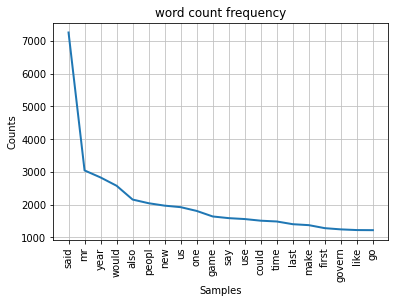

<AxesSubplot:title={'center':'word count frequency'}, xlabel='Samples', ylabel='Counts'>

In [65]:
f_distribution.plot(20, title='word count frequency', cumulative=False)

In [2]:
# from wordcloud import WordCloud

# Vectorizing bbc new dataset : Using TF-IDF approach

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

In [68]:
# just getting sample date for testing neural network....
mini_data = dataset['clean_text'][:100]
mini_data.head()
test_data = dataset['clean_text'][99:130]
label = dataset["category"][0:130]
label = lb.fit_transform(label)
train_label , test_label = label[:100] , label[99:130]
print(test_data)

99     [rapper, kany, west, shrewd, soul, us, hiphop,...
100    [housew, lift, channel, 4, rate, debut, us, te...
101    [mauresmo, open, victori, la, ameli, mauresmo,...
102    [target, better, mani, econom, target, set, li...
103    [hagu, sixfigur, earn, shown, reward, leav, fr...
104    [howard, pitch, uk, ethnic, vote, michael, how...
105    [loyalti, card, idea, tv, addict, viewer, coul...
106    [mcclaren, eye, uefa, cup, top, spot, steve, m...
107    [lit, idol, begin, search, author, second, pop...
108    [hong, kong, 2011, world, cup, bid, hong, kong...
109    [web, radio, take, spanish, rap, global, spin,...
110    [us, trade, gap, hit, record, 2004, gap, us, e...
111    [rapper, jayz, becom, label, boss, rap, star, ...
112    [prodigi, monfil, blow, away, gaudio, french, ...
113    [berlin, hail, european, cinema, organis, say,...
114    [beckham, relief, real, go, david, beckham, ex...
115    [byrd, produc, melcher, die, 62, record, produ...
116    [anim, charm, japan, box

In [56]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [57]:
# creating dictionary of token with unique index
tokenize = Tokenizer(num_words=5000 , oov_token="<OOV>")
tokenize.fit_on_texts(mini_data)
len(tokenize.word_index)

4706

In [58]:
word_diction = tokenize.word_index
# print(word_diction)
# creating a documental text to sequence
sequence = tokenize.texts_to_sequences(mini_data)
# print(sequence[:2])
# word padding is essential for doc with unqual lenth
pad_text = pad_sequences(sequence)
train_pad = pad_text
print(pad_text.shape)
test_seq = tokenize.texts_to_sequences(test_data)
test_pad = pad_sequences(test_seq, maxlen=668)
test_pad.shape

(100, 668)


(31, 668)

In [49]:
train_label

array([4, 0, 3, 3, 1, 2, 2, 3, 3, 1, 1, 0, 0, 2, 3, 0, 2, 3, 0, 4, 4, 4,
       3, 3, 4, 3, 1, 4, 2, 1, 2, 4, 1, 1, 0, 2, 4, 1, 2, 0, 2, 3, 0, 3,
       4, 1, 2, 2, 2, 0, 3, 2, 0, 0, 3, 2, 0, 3, 3, 0, 0, 3, 0, 3, 0, 4,
       0, 1, 4, 0, 2, 0, 2, 3, 0, 4, 0, 3, 3, 0, 0, 3, 2, 0, 1, 2, 2, 0,
       1, 0, 3, 3, 2, 3, 2, 3, 0, 3, 0, 1])

In [50]:
test_label

array([1, 1, 3, 0, 2, 2, 4, 3, 1, 3, 4, 0, 1, 3, 1, 3, 1, 1, 2, 3, 3, 1,
       2, 0, 4, 0, 0, 4, 3, 2, 3])

In [51]:
len(train_label)

100

In [52]:
# training nueral network

vocab_size = 5000
pad_length = 668
embedding_dim = 20

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=pad_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(120, activation="relu"),
    tf.keras.layers.Dense(5, activation="sigmoid")
])

model.compile(loss='sparse_categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])


In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 668, 20)           100000    
                                                                 
 global_average_pooling1d_2   (None, 20)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 120)               2520      
                                                                 
 dense_5 (Dense)             (None, 5)                 605       
                                                                 
Total params: 103,125
Trainable params: 103,125
Non-trainable params: 0
_________________________________________________________________


In [44]:
epoch = 100
model.fit(train_pad, train_label, epochs=epoch, validation_data=(test_pad,test_label), verbose=2)

Epoch 1/100
4/4 - 0s - loss: 1.5535 - accuracy: 0.2800 - val_loss: 1.6554 - val_accuracy: 0.1613 - 54ms/epoch - 14ms/step
Epoch 2/100
4/4 - 0s - loss: 1.5537 - accuracy: 0.2800 - val_loss: 1.6559 - val_accuracy: 0.1613 - 55ms/epoch - 14ms/step
Epoch 3/100
4/4 - 0s - loss: 1.5539 - accuracy: 0.2800 - val_loss: 1.6576 - val_accuracy: 0.1613 - 39ms/epoch - 10ms/step
Epoch 4/100
4/4 - 0s - loss: 1.5543 - accuracy: 0.2800 - val_loss: 1.6576 - val_accuracy: 0.1613 - 41ms/epoch - 10ms/step
Epoch 5/100
4/4 - 0s - loss: 1.5539 - accuracy: 0.2800 - val_loss: 1.6545 - val_accuracy: 0.1613 - 45ms/epoch - 11ms/step
Epoch 6/100
4/4 - 0s - loss: 1.5540 - accuracy: 0.2800 - val_loss: 1.6529 - val_accuracy: 0.1613 - 44ms/epoch - 11ms/step
Epoch 7/100
4/4 - 0s - loss: 1.5546 - accuracy: 0.2800 - val_loss: 1.6527 - val_accuracy: 0.1613 - 40ms/epoch - 10ms/step
Epoch 8/100
4/4 - 0s - loss: 1.5544 - accuracy: 0.2800 - val_loss: 1.6529 - val_accuracy: 0.1613 - 46ms/epoch - 11ms/step
Epoch 9/100
4/4 - 0s - l

Epoch 68/100
4/4 - 0s - loss: 1.5529 - accuracy: 0.2800 - val_loss: 1.6448 - val_accuracy: 0.1613 - 42ms/epoch - 10ms/step
Epoch 69/100
4/4 - 0s - loss: 1.5524 - accuracy: 0.2800 - val_loss: 1.6421 - val_accuracy: 0.1613 - 39ms/epoch - 10ms/step
Epoch 70/100
4/4 - 0s - loss: 1.5530 - accuracy: 0.2800 - val_loss: 1.6385 - val_accuracy: 0.1613 - 46ms/epoch - 11ms/step
Epoch 71/100
4/4 - 0s - loss: 1.5522 - accuracy: 0.2800 - val_loss: 1.6378 - val_accuracy: 0.1613 - 40ms/epoch - 10ms/step
Epoch 72/100
4/4 - 0s - loss: 1.5521 - accuracy: 0.2800 - val_loss: 1.6365 - val_accuracy: 0.1613 - 40ms/epoch - 10ms/step
Epoch 73/100
4/4 - 0s - loss: 1.5524 - accuracy: 0.2800 - val_loss: 1.6344 - val_accuracy: 0.1613 - 36ms/epoch - 9ms/step
Epoch 74/100
4/4 - 0s - loss: 1.5526 - accuracy: 0.2800 - val_loss: 1.6347 - val_accuracy: 0.1613 - 35ms/epoch - 9ms/step
Epoch 75/100
4/4 - 0s - loss: 1.5525 - accuracy: 0.2800 - val_loss: 1.6359 - val_accuracy: 0.1613 - 41ms/epoch - 10ms/step
Epoch 76/100
4/4 -

In [28]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization


In [29]:
list_da = list(mini_data)

In [30]:
sentences = [
    'i love my dog',
    'i am cool at love my cat and monkey',
    'you love my own cat cow goat'
]
tfidf = TextVectorization(
    max_tokens = 10, 
    output_mode = 'tf-idf',
    pad_to_max_tokens=True,
    
)

# bulding vocabulary
tfidf.adapt(sentences)

# getting a tf idf matrix
tf_sequence = tfidf(sentences)
tf_sequence[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.        , 0.5596158 , 0.5596158 , 0.6931472 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.91629076],
      dtype=float32)>

In [31]:
train_data2 = dataset['clean_text'][:100]
train_data2.head()
test_data2 = dataset['clean_text'][99:130]
label2 = dataset["category"][0:130]

In [32]:
# creating dictionary of token with unique index
tokenize = Tokenizer(num_words=5000 , oov_token="<OOV>")
tokenize.fit_on_texts(train_data2)
len(tokenize.word_index)

4706

In [33]:
word_diction = tokenize.word_index
# print(word_diction)
# creating a documental text to sequence
sequence = tokenize.texts_to_matrix(train_data2, mode='tfidf')
# print(sequence[:2])
# word padding is essential for doc with unqual lenth
pad_text = pad_sequences(sequence, maxlen=668)
train_pad = pad_text
print(pad_text.shape)
test_seq = tokenize.texts_to_matrix(test_data2, mode='tfidf')
test_pad = pad_sequences(test_seq, maxlen=668)
test_pad.shape

(100, 668)


(31, 668)

In [1]:
import enchant

ModuleNotFoundError: No module named 'enchant'